This notebook shows TS plots with histogram frequency data. histxy command courtesy of Kyle.

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import falkor_ctd
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set_style("darkgrid", {"grid.linewidth": .5, "axes.facecolor": ".9"})

mackas = {}
mackas['Sources']=['Juan de Fuca','Offshore','Subarctic','California Undercurrent','Coastal Deep']
mackas['Salinity']=[31.55,32.62,33.57,33.90,34.10]
mackas['Temperature']=[9.84,8.75,4.70,6.90,5.10]
mackas['Nitrate']=[24.68,7.63,29.00,33.40,40.00]
mackas['Phosphate']=[2.19,1.11,2.30,2.65,3.20]
mackas['Oxygen']=[5.26,6.20,4.65,2.10,0.50]
mackas['Silicate']=[41.76,12.55,48.00,52.00,90.00]

%matplotlib inline

In [7]:
def hist2dxy(hist_x, hist_y, Xnum, Ynum, clevs, CMap='Spectral_r',Xlim=[31,35],Ylim=[1,17]):
    #Xlim=[np.nanmin(hist_x)-0.5, np.nanmax(hist_x)+0.5]
    #Xlim=[31,35]
    Xbins=np.linspace(Xlim[0], Xlim[1], Xnum, dtype=np.float)
    #Ylim=[np.nanmin(hist_y)-0.5, np.nanmax(hist_y)+0.5]
    #Ylim=[1,17]
    Ybins=np.linspace(Ylim[0], Ylim[1], Ynum, dtype=np.float)
    H, y_edges, x_edges = np.histogram2d(hist_y, hist_x, bins=(Ybins, Xbins))
    X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])
    # set axis
    left=0.1; width = 0.8; bottom=0.1; height = 0.65
    gap=0.02; hist_len=0.2; cbar_len=0.12
    # three boxes
    rect_main  = [left+hist_len+gap, bottom, width, height]
    rect_histx = [left+hist_len+gap, left+height+gap, width-cbar_len, hist_len]
    rect_histy = [left, bottom, hist_len, height]
    # x, y limits
    xlim_bin=[np.min(X), np.max(X)]
    ylim_bin=[np.min(Y), np.max(Y)]
    # ========== figure ========== #
    fig=plt.figure(figsize=(6, 4.5))
    # ========== Main ========== #
    # axis
    axMain=plt.axes(rect_main)
    axMain.yaxis.tick_right()
    axMain.yaxis.set_label_position('right')
    axMain.set_xlim(xlim_bin)
    axMain.set_ylim(ylim_bin)
    divider=make_axes_locatable(axMain)
    # grid and frame
    axMain.grid() # grid on
    [i.set_linewidth(2) for i in axMain.spines.itervalues()] # a bold frame
    #CS=axMain.contourf(X, Y, H, clevs, cmap=CMap, extend='max') # 2-D histgram
    CS=axMain.pcolormesh(X, Y, H, cmap=CMap,vmax=clevs[-1])#, extend='max') # 2-D histgram
    CAx=divider.append_axes('right', size='5%', pad=0.75)
    CBar=plt.colorbar(CS, cax=CAx)
    CBar.set_label('Number of points', fontsize=10)
    #CBar.ax.tick_params(axis='y', length=22.5)
    # ========== Hist-x ========== #
    axHistx=plt.axes(rect_histx)
    axHistx.hist(hist_x, bins=Xbins, color='gray')
    axHistx.set_xlim(Xlim)
    axHistx.axes.get_xaxis().set_visible(False)
    # scientific notation for x, y-axis
    plt.ticklabel_format(style='sci', axis='both')#, scilimits=(0,0))
    [i.set_linewidth(2) for i in axHistx.spines.itervalues()]
    #axHistx.grid()
    # ========== Hist-y ========== #
    axHisty = plt.axes(rect_histy)
    axHisty.hist(hist_y, bins=Ybins, color='gray', orientation='horizontal')
    axHisty.set_ylim(Ylim)
    axHisty.invert_xaxis()
    axHisty.axes.get_yaxis().set_visible(False)
    plt.ticklabel_format(style='sci', axis='both')#, scilimits=(0,0))
    [i.set_linewidth(2) for i in axHisty.spines.itervalues()]
    #axHisty.grid()
    
    return axMain, axHistx, axHisty

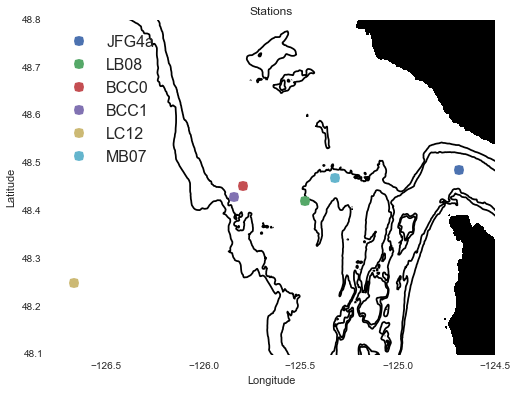

In [8]:
import scipy.io
topo_mat = scipy.io.loadmat('../../3_Repo/topo/SouthVIgrid.mat')

topo_lon = topo_mat['SouthVIgrid']['lon'][0][0]
topo_lat = topo_mat['SouthVIgrid']['lat'][0][0]
topo_depth = topo_mat['SouthVIgrid']['depth'][0][0]

LON,LAT=np.meshgrid(topo_lon,topo_lat)

plt.figure(figsize=(8,6))

plt.contourf(LON,LAT,topo_depth,levels=[0,0],colors='k',linewidth=10)
plt.contour(LON,LAT,topo_depth+150,levels=[0],colors='k',linewidth=4,linestyle='-')
plt.contour(LON,LAT,topo_depth+200,levels=[0],colors='k',linewidth=4,linestyle='-')
#plt.contour(LON,LAT,topo_depth,levels=[-1000],colors='k',linewidth=4,linestyle='-')

filenames = [f for f in os.listdir(falkor_ctd.DIRECTORY) if (f.startswith('2013-57-00') and f.endswith('avg'))]

for count,filename in enumerate(sorted(filenames)):
    thedata,index,station,lat,lon = falkor_ctd.falkor_ctd_dat(filename)
    
    #print lat.split(' ')
    #print lon.split(' ')
    
    f_lat = float(lat.split(' ')[1]) + float(lat.split(' ')[3])/60.0
    f_lon = -(float(lon.split(' ')[0]) + float(lon.split(' ')[2])/60.0)
    
    plt.plot(f_lon,f_lat,'o',label=station,markersize=10)
plt.xlim((-126.8,-124.5))
plt.ylim((48.1,48.8))
plt.legend(loc=2,fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stations')
plt.show()

Compare Salinity vs Temperature for Falkor measurements. Mackas reported water source compositions overlaid with circular markers.
============================================

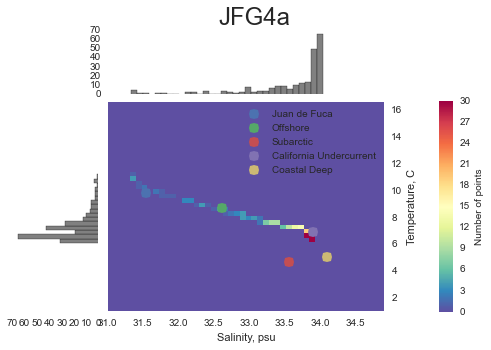

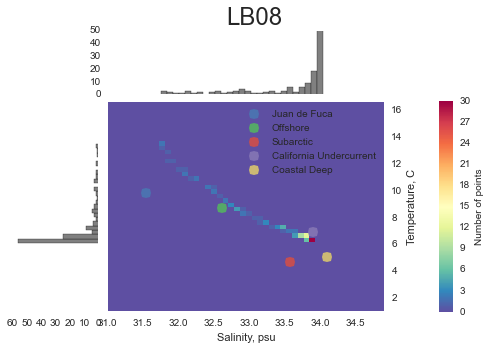

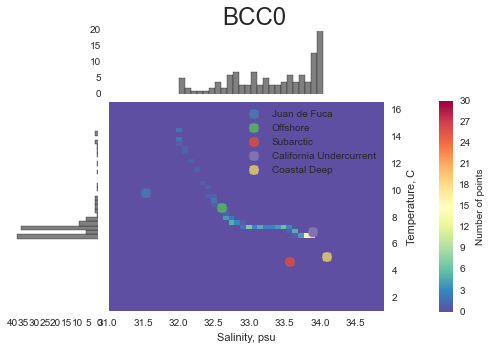

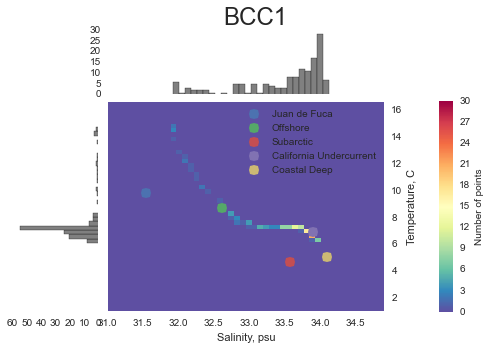

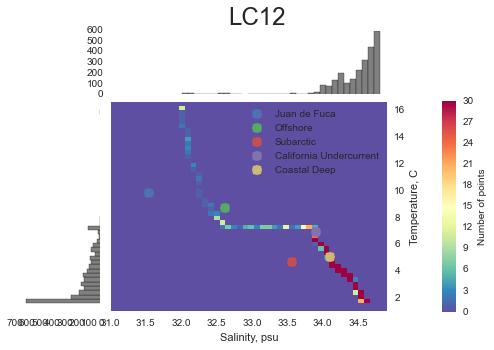

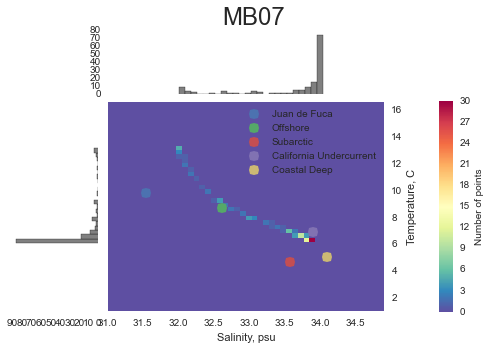

In [11]:
filenames = [f for f in os.listdir(falkor_ctd.DIRECTORY) if (f.startswith('2013-57-00') and f.endswith('avg'))]

for count,filename in enumerate(sorted(filenames)):
    thedata,index,station,lat,lon=falkor_ctd.falkor_ctd_dat(filename)
    
    #plt.subplot(3,3,count+1)
    Xhist_cnt = 50
    Yhist_cnt = 50
    max_cnt = 30 #len(thedata[index['Salinity'],:])/(Xhist_cnt/5)
    
    (axmain,axhistx,axhisty)=hist2dxy(thedata[index['Salinity'],:],thedata[index['Temperature'],:],Xhist_cnt,Yhist_cnt,np.linspace(0,1,100)*max_cnt)
    
    axhistx.set_title(station,fontsize=24)
    
    for ii in range(0,len(mackas['Salinity'])):
        axmain.plot(mackas['Salinity'][ii],mackas['Temperature'][ii],'o',ms=10,label=mackas['Sources'][ii])
    axmain.legend()
    #axmain.plot(33.9,6.9, s=80, marker='o', edgecolor='black', linewidth='1')
    #axmain.plot(31.55,9.84, s=80, marker='o', edgecolor='black', linewidth='1')
    axmain.set_xlabel('Salinity, psu')
    axmain.set_ylabel('Temperature, C')
    plt.show()

Each profile shows a significant clustering of points near the densest water mass, suggesting that this particular water mass consitutes a significant portion of each water column.

In [12]:
for keys in index:
    print keys

Temperature
Oxygen
Fluorescence
Salinity
Pressure
Turbidity


Compare Salinity vs Oxygen for Falkor measurements. Mackas reported water source compositions overlaid with circular markers.
============================================

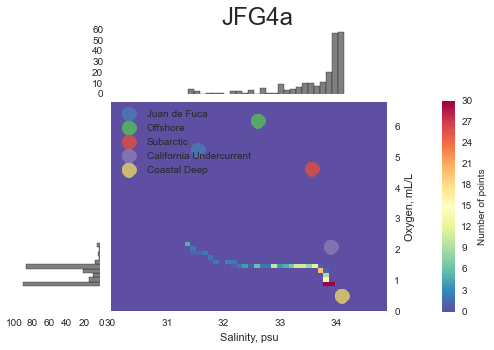

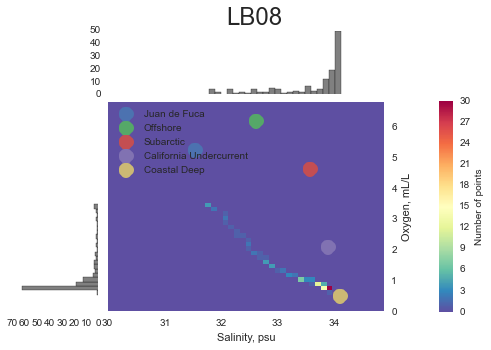

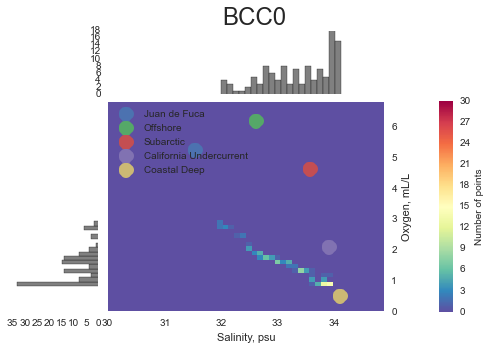

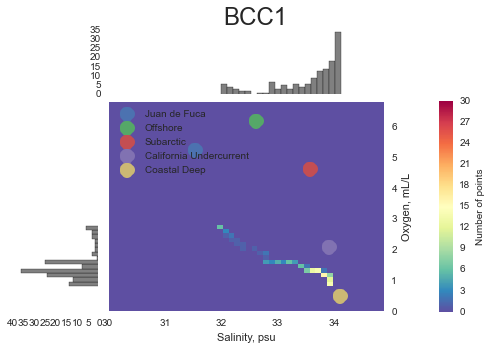

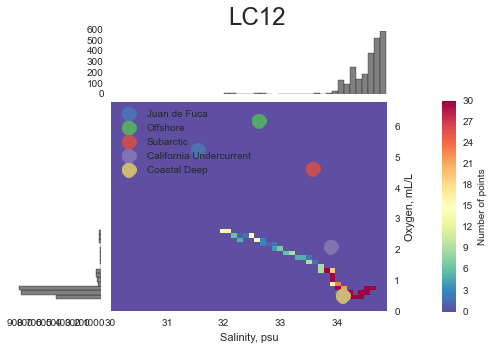

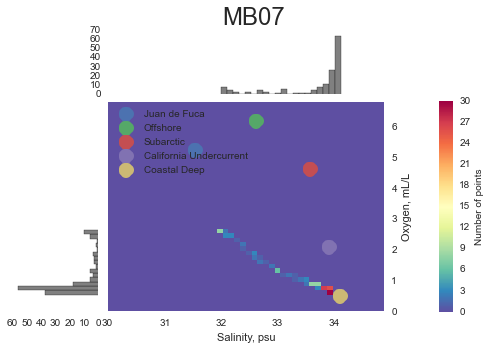

In [14]:
filenames = [f for f in os.listdir(falkor_ctd.DIRECTORY) if (f.startswith('2013-57-00') and f.endswith('avg'))]

for count,filename in enumerate(sorted(filenames)):
    thedata,index,station,lat,lon=falkor_ctd.falkor_ctd_dat(filename)
    
    #plt.subplot(3,3,count+1)
    Xhist_cnt = 50
    Yhist_cnt = 50
    max_cnt = 30 #len(thedata[index['Salinity'],:])/(Xhist_cnt/5)
    
    (axmain,axhistx,axhisty)=hist2dxy(thedata[index['Salinity'],:],thedata[index['Oxygen'],:],Xhist_cnt,Yhist_cnt,np.linspace(0,1,100)*max_cnt,Xlim=[30,35],Ylim=[0,7])
    
    axhistx.set_title(station,fontsize=24)
    
    for ii in range(0,len(mackas['Oxygen'])):
        axmain.plot(mackas['Salinity'][ii],mackas['Oxygen'][ii],'o',ms=15,label=mackas['Sources'][ii])
    axmain.legend(loc=2)#,fontsize=14)
    #axmain.plot(33.9,6.9, s=80, marker='o', edgecolor='black', linewidth='1')
    #axmain.plot(31.55,9.84, s=80, marker='o', edgecolor='black', linewidth='1')
    axmain.set_xlabel('Salinity, psu')#,fontsize=14)
    axmain.set_ylabel('Oxygen, mL/L')#,fontsize=14)
    plt.show()

The Dissolved Oxygen is significantly higher in Mackas et al. [1987] than it is observed here. The only salinity/oxygen consistency appears to be with the deep coastal water, but even still it does not match up as well. It should be noted that it has been checked both reported quantities are in the same units.

Mackas et al. [1987] reported values based on historical data from 1959-"present", so max 1987. Is it reasonable to expect that the California Undercurrent Oxygen content has decreased from $>2 mL/L$ to $<1 mL/L$ in this time period?